In [1]:
import pandas as pd
from tabulate import tabulate

filepath = "/Users/podaboutit/Library/CloudStorage/Dropbox/Windows Share/nba api/stats/tracking/team/league_2021-22_Efficiency_____2023-09-24.csv"

# load the names of the stat categories
categories = pd.read_csv(filepath, nrows=0).columns.tolist()

print(categories)

['PLAYER_ID', 'PLAYER_NAME', 'W', 'L', 'POINTS', 'DRIVE_PTS', 'DRIVE_FG_PCT', 'CATCH_SHOOT_PTS', 'CATCH_SHOOT_FG_PCT', 'PULL_UP_PTS', 'PULL_UP_FG_PCT', 'PAINT_TOUCH_PTS', 'PAINT_TOUCH_FG_PCT', 'POST_TOUCH_PTS', 'POST_TOUCH_FG_PCT', 'ELBOW_TOUCH_PTS', 'ELBOW_TOUCH_FG_PCT', 'EFF_FG_PCT']


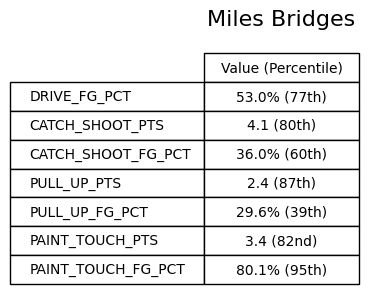

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

player_name = "Miles Bridges"
categories = [
    "DRIVE_FG_PCT",
    "CATCH_SHOOT_PTS",
    "CATCH_SHOOT_FG_PCT",
    "PULL_UP_PTS",
    "PULL_UP_FG_PCT",
    "PAINT_TOUCH_PTS",
    "PAINT_TOUCH_FG_PCT",
]

# Load the data
df = pd.read_csv(filepath)

# Filter the dataframe for LaMelo Ball
player_df = df[df["PLAYER_NAME"] == player_name]

# Initialize a dictionary to store the results
player_percentiles = {}

# Calculate the percentile for each category
for category in categories:
    # what is the value for player in this category?
    player_value = player_df[category].values[0]

    # if category has PCT in the name convert player value to a percentage and add to the dictionary, else add raw value to the dictionary
    if "PCT" in category:
        player_value = player_value * 100
        player_value = round(player_value, 1)
        player_value = f"{player_value}%"
    else:
        player_value = round(player_value, 1)
    player_percentiles[category] = player_value

    # where does player_value rank among all players in this category?
    percentile_rank = df[category].rank(pct=True, ascending=False)[player_df.index[0]]

    # if the category does not contain TOV or DEF flip the number so that 1 is the highest percentile
    if "TOV" not in category and "DEF" not in category:
        percentile_rank = 1 - percentile_rank
    # Convert to percentile, round to whole number, add th or nd
    percentile = percentile_rank * 100
    percentile = round(percentile, 0)
    # if percentile ends in 1, 2, or 3, add st, nd, or rd
    if percentile % 10 == 1:
        percentile = f"{percentile}st"
    elif percentile % 10 == 2:
        percentile = f"{percentile}nd"
    elif percentile % 10 == 3:
        percentile = f"{percentile}rd"
    else:
        percentile = f"{percentile}th"

    # remove.0 from the end of the percentile
    percentile = percentile.replace(".0", "")

    # Add to the dictionary
    player_percentiles[category] = f"{player_value} ({percentile})"

# convert the dictionary to a dataframe
df = pd.DataFrame.from_dict(
    player_percentiles, orient="index", columns=["Value (Percentile)"]
)

# create an image out of the data and show it, make sure the columns fit the data
plt.figure(figsize=(2, 3))
plt.axis("off")
# make the title the player_name and justify it center
plt.title(player_name, fontsize=16, pad=20, loc="center")
plt.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=df.index,
    loc="center",
    cellLoc="center",
    colWidths=[1, 1],
    fontsize=14,
    bbox=[0, 0, 1, 1],
)
plt.show()